<a href="https://colab.research.google.com/github/kang9366/Cifar10-Image-Classification/blob/main/Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

## Data Load

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape
X_train_full.dtype

dtype('uint8')

## Feature Scaling

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Model Compose

In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation = "relu"),
  keras.layers.Dense(100, activation = "relu"),
  keras.layers.Dense(10, activation = "softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.0887 - accuracy: 0.9659 - val_loss: 0.4293 - val_accuracy: 0.9080
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0780 - accuracy: 0.9704 - val_loss: 0.4359 - val_accuracy: 0.9070
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0746 - accuracy: 0.9719 - val_loss: 0.4427 - val_accuracy: 0.9056
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0722 - accuracy: 0.9729 - val_loss: 0.4520 - val_accuracy: 0.9060
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0707 - accuracy: 0.9734 - val_loss: 0.4533 - val_accuracy: 0.9072
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0693 - accuracy: 0.9743 - val_loss: 0.4592 - val_accuracy: 0.9064
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0680 - accuracy: 0.9743 - val_loss: 0.4609 - val_accuracy

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5793 - accuracy: 0.9011


[0.5792893767356873, 0.9010999798774719]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 58ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict(X_new)
y_pred = y_pred.argmax(axis=-1)
y_pred

1/1 [==============================] - 0s 18ms/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

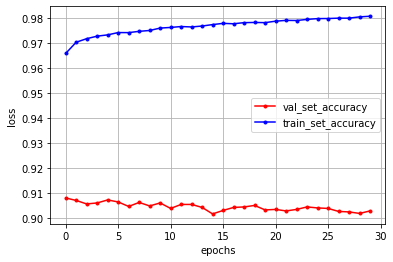

In [ ]:
y_vloss = history.history['val_accuracy']
y_loss = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_accuracy')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()